# <center> Unsupervised learning: Clusterings </center>

## 1. Partitioning clustering: `k-means`

![](https://miro.medium.com/max/1280/1*5UHmgCaTD8EegsPuKcxC1Q.png)

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [35]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
iris = sns.load_dataset('iris')
iris.head(5)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


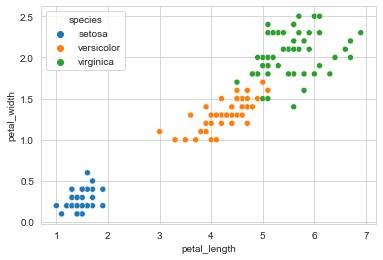

In [11]:
sns.set_style('whitegrid')
sns.scatterplot(data=iris,
               x='petal_length',
               y='petal_width',
               hue='species'
               )
plt.show()

In [7]:
from sklearn.cluster import KMeans

In [46]:
X, y = iris[['petal_length','petal_width']], iris['species']
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)

KMeans(n_clusters=3)

In [47]:
ypred = kmeans.predict(X)

In [48]:
value_map = {0: 'setosa' , 1:'versicolor' , 2: 'virginica'}
ypred = np.array([value_map[i] for i in ypred])
ypred

array(['setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'virginica', 'virginica', 'virginica',
       'virginica', 'virginica', 'virginica', 'virginica', 'virginica',
       'virginica', 'virginica', 'virginica', 'virginica', 'virginica',
       'virginica', 'virginica', 'virginica', 'virginica', 'virginica',
       'virginica', 'virginica', 'virginica', 'virginica', 'virginica',
       'virginica', 'virginica', 'virginica', 'virginica', 'versicolor',
       'virginica', 'virginica', 'vir

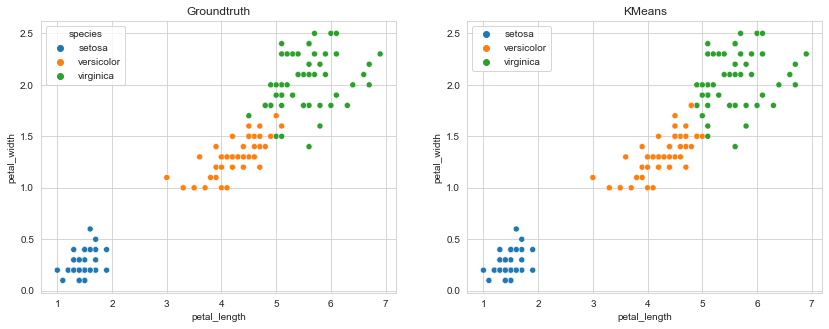

In [28]:
fig, axs= plt.subplots(1, 2, figsize=(14,5))
ax = sns.scatterplot(data=X,
                x='petal_length',
                y='petal_width',
                hue=y,
                ax=axs[0]
               )
ax.set_title('Groundtruth')

ax1 = sns.scatterplot(data=X,
                x='petal_length',
                y='petal_width',
                hue=ypred,
                ax=axs[1]
               )
ax1.set_title('KMeans')

plt.show()

In [29]:
kmeans.inertia_ #sum of distance

31.371358974358973

In [31]:
sse = []
for i in range(1,10): # from 1 to 10 cluster, which number of clusters is optimal?
    km = KMeans(n_clusters=i)
    km.fit(X)
    sse.append((i, km.inertia_))

sse

[(1, 550.8953333333333),
 (2, 86.39021984551397),
 (3, 31.371358974358973),
 (4, 19.477123363965468),
 (5, 13.91690875790876),
 (6, 11.084603984709247),
 (7, 9.23659595959596),
 (8, 7.672362403043181),
 (9, 6.585407522429261)]

In [33]:
sse = np.array(sse)
sse

array([[  1.        , 550.89533333],
       [  2.        ,  86.39021985],
       [  3.        ,  31.37135897],
       [  4.        ,  19.47712336],
       [  5.        ,  13.91690876],
       [  6.        ,  11.08460398],
       [  7.        ,   9.23659596],
       [  8.        ,   7.6723624 ],
       [  9.        ,   6.58540752]])

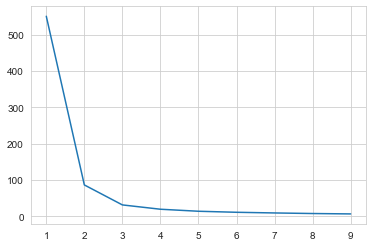

In [34]:
fig = plt.figure()
plt.plot(sse[:,0], sse[:,1])
plt.show()

## 2. Hierachical clustering: `agglomerative clustering` 
![](https://46gyn61z4i0t1u1pnq2bbk2e-wpengine.netdna-ssl.com/wp-content/uploads/2018/03/Screen-Shot-2018-03-28-at-11.48.48-am.png)
![](https://miro.medium.com/max/1039/0*afzanWwrDq9vd2g-)

In [38]:
from sklearn.cluster import AgglomerativeClustering
agglo = AgglomerativeClustering(n_clusters=3)
y_pred1 = agglo.fit_predict(X)

In [39]:
y_pred1

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [43]:
y_pred1 = np.array([value_map[i] for i in y_pred1])
y_pred1

array(['versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'virginica', 'virginica', 'setosa',
       'virginica', 'virginica', 'virginica', 'virginica', 'virginica',
       'virginica', 'virginica', 'virginica', 'virginica', 'virginica',
       'virginica', 'virginic

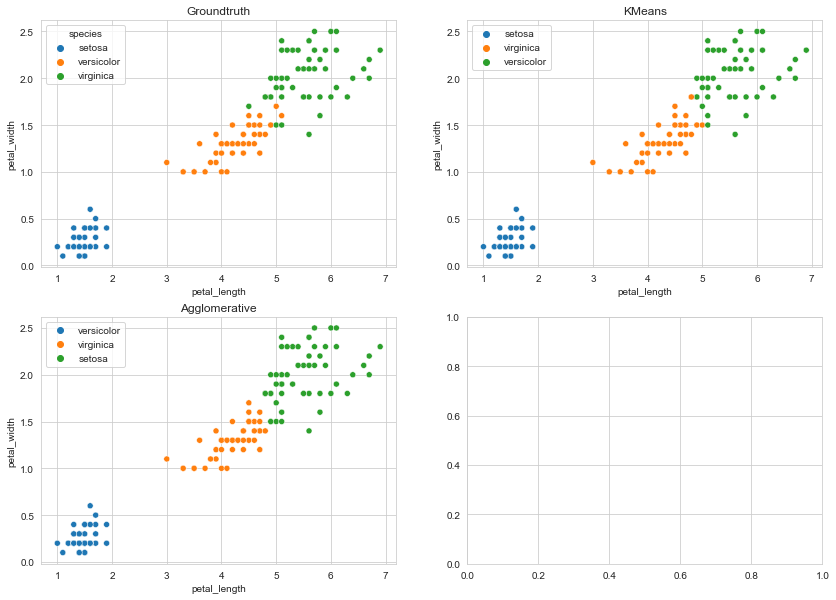

In [50]:
fig, axs= plt.subplots(2, 2, figsize=(14,10))
ax = sns.scatterplot(data=X,
                x='petal_length',
                y='petal_width',
                hue=y,
                ax=axs[0,0]
               )
ax.set_title('Groundtruth')

ax1 = sns.scatterplot(data=X,
                x='petal_length',
                y='petal_width',
                hue=ypred,
                ax=axs[0,1]
               )
ax1.set_title('KMeans')

ax2 = sns.scatterplot(data=X,
                x='petal_length',
                y='petal_width',
                hue=y_pred1,
                ax=axs[1,0]
               )
ax2.set_title('Agglomerative')

plt.show()

## 3. Density-based clustering: `DBSCAN`
![](https://user-images.githubusercontent.com/7659/74451662-d2325000-4e34-11ea-9770-a57e81259eb9.png)
![](https://miro.medium.com/proxy/1*tc8UF-h0nQqUfLC8-0uInQ.gif)

 1. Define kind of points in data given (pi, eps)
- Core point: contains at least `pi` data points within radius `eps`.
- Border point: not core point + at least 1 core point wwithin radius `eps`.
- Noise point: neither core point nor border.
2. Create a graph - core point if their eps are overlapped
3. Create a connected components & assign border point to connected components
4. Return points in each connected components as a cluster.

In [51]:
from sklearn.cluster import DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5) #pi, eps
y_pred2 = dbscan.fit_predict(X)

In [53]:
y_pred2 = np.array([value_map[i] for i in y_pred2])
y_pred2

array(['setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolo

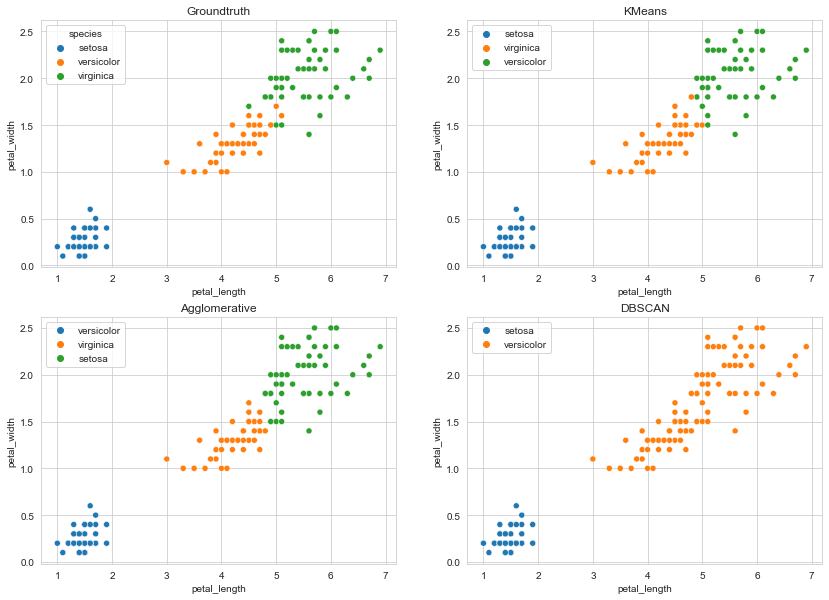

In [55]:
fig, axs= plt.subplots(2, 2, figsize=(14,10))
ax = sns.scatterplot(data=X,
                x='petal_length',
                y='petal_width',
                hue=y,
                ax=axs[0,0]
               )
ax.set_title('Groundtruth')

ax1 = sns.scatterplot(data=X,
                x='petal_length',
                y='petal_width',
                hue=ypred,
                ax=axs[0,1]
               )
ax1.set_title('KMeans')

ax2 = sns.scatterplot(data=X,
                x='petal_length',
                y='petal_width',
                hue=y_pred1,
                ax=axs[1,0]
               )
ax2.set_title('Agglomerative')


ax3 = sns.scatterplot(data=X,
                x='petal_length',
                y='petal_width',
                hue=y_pred2,
                ax=axs[1,1]
               )
ax3.set_title('DBSCAN')

plt.show()